In [1]:
import numpy as np

## task 01

Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 6.

Подсказка: оценкой вероятности может служить, например, относительная частота при большом числе опытов. Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и/или ваше терпение.

### task 01 var 1

In [2]:
def dice_freq(n):
    a = np.random.randint(1, 7, size=n)
    b = np.random.randint(1, 7, size=n)
    c = np.random.randint(1, 7, size=n)
    s = ((a + b + c) <= 6).sum()
    return s/n

In [3]:
from matplotlib import pyplot as plt
from tqdm.notebook import trange

plt.style.use('seaborn-whitegrid')

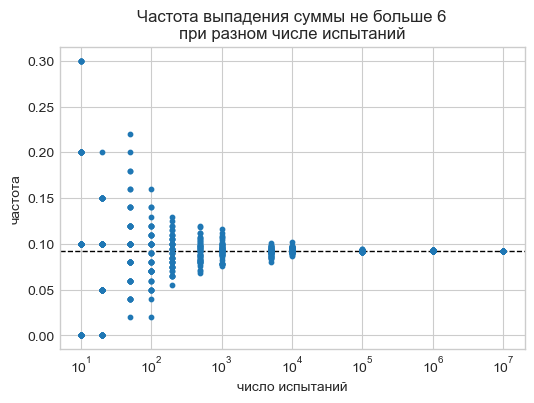

In [4]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(dice_freq(n))

plt.figure(dpi=100)
plt.scatter(x, y, s=10)
   
plt.axhline(y = 20 / 216, c='black', ls='dashed', lw=1).set_zorder(0)
plt.xscale('log')
plt.title('Частота выпадения суммы не больше 6\nпри разном числе испытаний')
plt.xlabel('число испытаний')
plt.ylabel('частота')

plt.show()

### task 01 var 2

In [5]:
import itertools

In [6]:
arrangements = list(itertools.product('123456', repeat=3))

In [7]:
total = len(arrangements)
good = [sum([int(a[i]) for i in range(3)]) <=6 for a in arrangements].count(True)
good, total

(20, 216)

In [8]:
P = good/total
P

0.09259259259259259

## task 02

Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

In [9]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [10]:
a1 = combinations(4, 1) * combinations(48, 3) #1 туз 3 обычных карты
a2 = combinations(4, 2) * combinations(48, 2) #2 туза 2 обычных карты
a3 = combinations(4, 3) * combinations(48, 1) #3 туза 1 обычная карта
a4 = combinations(4, 4) * combinations(48, 0) #4 туза 0 обычных карт
a1, a2, a3, a4

(69184, 6768, 192, 1)

In [11]:
a1 + a2 + a3 + a4

76145

## task 03

Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Какова вероятность того, что среди трёх наугад выбранных вопросов студент знает: а) все? б) два

### a)

In [12]:
combinations(60, 3) #всего вариантов выбрать 3 вопроса

34220

In [13]:
combinations(50, 3) #вариантов выбрать 3 из 50, которые знает

19600

In [14]:
combinations(50, 3)/combinations(60, 3)

0.5727644652250146

### b)

In [15]:
combinations(50, 2) #вариантов выбрать 2 из 50, которые знает

1225

In [16]:
combinations(10, 1) #вариантов выбрать 1 из 10, которые не знает

10

In [17]:
(combinations(10, 1) * combinations(50, 2)) / combinations(60, 3)

0.35797779076563413

## task 04

Бросается игральная кость. Пусть событие A - появление чётного числа, событие B - появление числа больше трёх. Являются ли эти события независимыми?

In [18]:
Pa = 1/2 #четное - 2, 4, 6

In [19]:
Pb = 1/2 #больше 3х - 4, 5, 6

In [20]:
Pab = 1/3 #четное больше 3х - 4, 6

In [21]:
Pab/Pb == Pa

False

## task 05

Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ.

Вопрос: какова вероятность, что вы действительно больны ей?

Подсказка: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.

In [22]:
# положительный тест = положительный тест|болен + положительный тест|здоров

$A$ - тест положительный, $B$ - Болен, $\overline{B}$ - здоров

$$P(B|A) = \dfrac{P(A|B) \cdot P(B)}{P(A)} = \dfrac{P(A|B) \cdot P(B)}{P(A | B) \cdot P(B) + P \left( A | \overline{B} \right) \cdot P \left( \overline{B} \right)}$$ 

$P(A|B) = 0.99$ - тест верен

$P(B) = 0.001$ - вероятность, что болен

$P(A|\overline{B}) = 0.01$ - тест ошибся

$P(\overline{B}) = 0.999$ - здоров

In [23]:
(0.99*0.001)/(0.99*0.001 + 0.01*0.999)

0.09016393442622951

In [24]:
#погрешность теста выше процента заболеваемости